In [1]:
# import 하는 부분
import pandas as pd
import lightgbm as lgb
# 불러오는 부분
train = pd.read_csv('C:/Users/Playdata/Desktop/workwork/DACON/movies_train.csv')
test = pd.read_csv('C:/Users/Playdata/Desktop/workwork/DACON/movies_test.csv')
submission = pd.read_csv('C:/Users/Playdata/Desktop/workwork/DACON/submission.csv')

In [2]:
# train 데이터에 어떠한 내용이 들어가 있는지 확인하는 부분
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
# test 데이터에 어떠한 부분이 존재하는지 알려주는 코드
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [4]:
# submisson 파일에 어떠한 내용이 들어가 있는지 알려주는 코드
submission.head()
# box_off_num 예측할 관객수

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [5]:
#train 데이터의 가장 아래부분 부터 확인하는 코드
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
# 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성
print(train.shape)
print(test.shape)
print(submission.shape)
# 트레인은 행이 600개 열이 12개 
# 테스트는 행이 243개 열이 11개 
# 하나 작은 이유는 영화의 관객수를 예측하기 위해서 제공되지 않음

(600, 12)
(243, 11)
(243, 2)


In [7]:
# 데이터 셋의 column별 정보를 알려주는 함수
train.info()
# 행이 600개인데 다 꽉 차있지만 7번 행에는 되어 있지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
test.info()
# 똑같이 7번 컬럼만 안 채워져 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [9]:
train.describe()
# 컬럼별 기술 통계량을 확인하는 함수
# 상영 시간 평균 100분 / ex) e.02 = 10**2 /  

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [10]:
pd.options.display.float_format = '{:.1f}'.format
# 해당 하는 코드를 통해서 e.02로 표시되는 내용을 보기 편하게 바꿔주는 코드이다.

In [11]:
# 장르별 관객 수 표시 가장 밑에 있는 부분이 가장 많다
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


<AxesSubplot:>

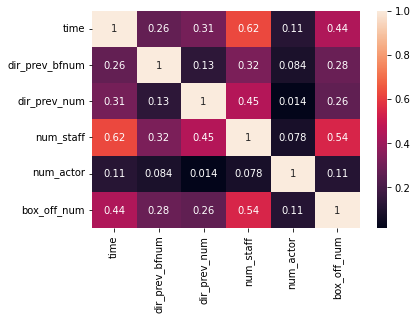

In [12]:
# 상관 계수에 대한 것을 알려주는 코드
# 위의 보기 좋게 만드었던 숫자를 원래대로 만들어주는 코드
pd.reset_option('display.float_format')
# 숫자로 보여주는 코드
train.corr()
# seaborn를 활용해서 보여주는 코드
import seaborn as sns
sns.heatmap(train.corr(), annot = True)
# 우리가 예측해야 되는 값은 box_off_num인데 아래의 표에서 살펴
# 보았을 때 상관계수가 큰 부분이 num_staff이다 
# 즉 영화를 제작한 스태프 수가 많을 수록 관객 수가 많음을 알 수 있다.

In [13]:
train.isna().sum()/600
# train.isna() 결측값이 있으면 true 없으면 false
# 다 더하면 true = 1 결측값이 dir_prev_bfnum에 330개의 결측값이 있다
# 600을 나누는 이유는 모든 행중에 얼마나 결측값이 있는지 파악

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [14]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()
# 결측값 있는 부분만 추출
# train['dir_prev_bfnum'] 해당 컬럼만 선택
# train['dir_prev_bfnum'].isna() 에게 na냐 na가 있으면 true
# train[train['dir_prev_bfnum'].isna()] 이 부분을 인덱싱 한다고 한다
# null 값 즉 결측값이 있는 부분만 추출됨
# 중간에 ...으로 되어 있는 부분이 0으로 되어 있는지 확인하기 위해서
# train[train['dir_prev_bfnum'].isna()]['dir_prev_num']으로 하면 다 줄어든다 ex) 0 nan
# train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum() 위의 값이 0이면 0이 나오겠죠

0

In [15]:
train
# 즉 0번의 dir_prev_bfnum의 값이 NaN인 부분은 dir_prev_num의 값이 0임을 알 수있다

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [16]:
# 그래서 dir_prev-bfnum의 값을 다 0으로 채워 넣을 것
# train['dir_prev_bfnum'].fillna(0, inplace = True)
train['dir_prev_bfnum'].fillna(0, inplace = True)

In [17]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [18]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [19]:
# test에도 결측값이 없어야 하기 때문에 이것도 0으로 바꿔져야 한다.
test.isna().sum()
# train에서도 확인했던 것도 마찬가지로 1로 나타나서 136이 뜬다

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [20]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [21]:
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.000000e+00,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.000000e+00,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


In [22]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [23]:
test.isna().sum()/600
# 위에서 0으로 바뀐 것을 확인하는 절차

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
dtype: float64

In [24]:
# x -> model -> y(영화 관객수)
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)
# 관객수는 연속적이기 때문에 LGBMREgressor를 사용, 
# LightGBM은 부스팅 모델, 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나감, 타 부스팅 모델에 비해 속도가 빠름
# Random forest는 배깅 모델 위의 LightGBM은 부스팅
# 속도가 가볍고 빠름 옆의 1000은 1000개를 만들겠다는 의미 

In [25]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']
# 타겟이 예측할 값

In [26]:
# 변수 선택 및 모델 구축
X_train, X_test, y_train = train[features], test[features], train[target]

In [27]:
# 모델 학습과 검증
# LightGBM
# k-fold lightGBM
# feature engineering
#  grid search(hyperparameter tuning)
#  아래로 갈 수록 성능이 좋아짐

# LightGBM
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [28]:
# submission data 사본 변수 입력
singleLGBM = submission.copy()
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [29]:
# 예측한 결과값을 singleLGBM['box_off_num']에 저장
singleLGBM['box_off_num'] = model.predict(X_test)
# 가독성을 위해 숫자 소수점 지정
pd.options.display.float_format = '{:.1f}'.format
# 확인
singleLGBM

,title,box_off_num
0,용서는 없다,2817995.2
1,아빠가 여자를 좋아해,375377.2
2,하모니,-569324.3
3,의형제,1581189.0
4,평행 이론,-527780.6
...,...,...
238,해에게서 소년에게,500784.4
239,울보 권투부,1013858.4
240,어떤살인,1682067.7
241,말하지 못한 비밀,300216.3


In [30]:
# csv 파일 만들어서 결과물 저장
# singleLGBM.to_csv('data/singleLGBM.csv', index = False)

<!-- k-fold 교차 검증 -->

In [31]:
# 패키지 불러오기
from sklearn.model_selection import KFold
# 데이터 분할 수 = 5, 데이터 shuffle 하기
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

In [32]:
# X_train data 에서 train 480개, val 120개로 분할

for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


In [33]:
# 교차 검증하여, LGBMRegressor 모델 학습시키기

model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds = 100, verbose = 100))

[100]	valid_0's l2: 2.70572e+12


c:\Users\Playdata\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Playdata\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12
[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [34]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [35]:
# 예측 결과값 정리

preds = []

for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [36]:
# 예측 결과값 확인

preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [37]:
# submission 사본을 kfoldLightGBM 입력
kfoldLightGBM = submission.copy()


# 예측 결과값 kfoldLightGBM['box_off_num'] 에 추가
import numpy as np
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)


# kfoldLightGBM 상위 5개의 행 출력
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3367422.1
1,아빠가 여자를 좋아해,961138.9
2,하모니,1097929.7
3,의형제,2097270.8
4,평행 이론,781476.3


In [38]:
# kfoldLightGBM.csv 파일 만든 후 결과값 저장

# kfoldLightGBM.to_csv('data/kfoldLightGBM.csv', index = False)

In [39]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [40]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [41]:
train.genre

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [42]:
# train data의 genre 값을 정수로 변환

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [43]:
# test data의 genre 값을 정수로 변환

test['genre'] = le.transform(test['genre'])
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int32

In [44]:
# features 값 재정의

features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [45]:
# 학습을 위해 필요한 변수에 값 할당

X_train, X_test, y_train = train[features], test[features], train[target]

In [46]:
# k-fold 와 LGBMRegressor 로 학습 시키기

model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

c:\Users\Playdata\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Playdata\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.62067e+12
[100]	valid_0's l2: 4.39227e+12
[100]	valid_0's l2: 3.29841e+12
[100]	valid_0's l2: 1.56499e+12
[100]	valid_0's l2: 1.60118e+12


In [47]:
X_test.head()

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,300529.0,2
1,113,4,275,3,342700.2,5
2,115,3,419,7,4206610.7,4
3,116,2,408,2,691342.0,10
4,110,1,380,1,31738.0,1


In [48]:
# X_test로 결과값 예측

preds = []

for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [49]:
# submission 사본을 feLightGBM 에 할당
feLightGBM = submission.copy()


# 예측값의 평균을 feLightGBM['box_off_num'] 에 할당
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)


# feLightGBM.csv 파일 만든 후 결과값 저장
# feLightGBM.to_csv('data/feLightGBM.csv', index = False)

<!-- Grid Search -->

In [50]:
# 필요한 패키지 불러오기
from sklearn.model_selection import GridSearchCV

In [51]:
# 최적화된 파라미터 찾기

model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]    
}

gs = GridSearchCV(estimator = model,
                 param_grid = params,
                 scoring = 'neg_mean_squared_error',
                 cv = k_fold)

In [52]:
# 학습시키기
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [53]:
# 최적화된 파라미터 출력
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

In [54]:
# 학습 시키기

model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000, 
                          learning_rate = 0.003, min_child_samples = 30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

c:\Users\Playdata\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Playdata\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45583e+12
[300]	valid_0's l2: 2.42575e+12
[400]	valid_0's l2: 2.43392e+12
[100]	valid_0's l2: 4.89194e+12
[200]	valid_0's l2: 4.40922e+12
[300]	valid_0's l2: 4.19146e+12
[400]	valid_0's l2: 4.05951e+12
[500]	valid_0's l2: 3.96931e+12
[600]	valid_0's l2: 3.91727e+12
[700]	valid_0's l2: 3.88462e+12
[800]	valid_0's l2: 3.87695e+12
[900]	valid_0's l2: 3.87088e+12
[100]	valid_0's l2: 3.14361e+12
[200]	valid_0's l2: 2.79286e+12
[300]	valid_0's l2: 2.59302e+12
[400]	valid_0's l2: 2.47608e+12
[500]	valid_0's l2: 2.40386e+12
[600]	valid_0's l2: 2.36407e+12
[700]	valid_0's l2: 2.38505e+12
[100]	valid_0's l2: 1.60592e+12
[200]	valid_0's l2: 1.40227e+12
[300]	valid_0's l2: 1.30053e+12
[400]	valid_0's l2: 1.25184e+12
[500]	valid_0's l2: 1.23543e+12
[600]	valid_0's l2: 1.23595e+12
[100]	valid_0's l2: 1.96107e+12
[200]	valid_0's l2: 1.75478e+12
[300]	valid_0's l2: 1.64513e+12
[400]	valid_0's l2: 1.58132e+12
[500]	valid_0's l2: 1.54801e+12
[600]	va

In [55]:
# 예측 결과값 정리

preds = []

for model in models:
    preds.append(model.predict(X_test))

In [56]:
# 최고 점수 출력
gs.best_score_

-2334525343085.6494

In [57]:
# 예측 결과값 파일에 저장 하는 과정
gslgbm = submission.copy()
gslgbm['box_off_num'] = np.mean(preds, axis = 0)
# gslgbm.to_csv('data/gslgbm.csv', index = False)

<!-- 값 비교 -->

In [58]:
singleLGBM

,title,box_off_num
0,용서는 없다,2817995.2
1,아빠가 여자를 좋아해,375377.2
2,하모니,-569324.3
3,의형제,1581189.0
4,평행 이론,-527780.6
...,...,...
238,해에게서 소년에게,500784.4
239,울보 권투부,1013858.4
240,어떤살인,1682067.7
241,말하지 못한 비밀,300216.3


In [59]:
kfoldLightGBM

,title,box_off_num
0,용서는 없다,3367422.1
1,아빠가 여자를 좋아해,961138.9
2,하모니,1097929.7
3,의형제,2097270.8
4,평행 이론,781476.3
...,...,...
238,해에게서 소년에게,177095.8
239,울보 권투부,210255.5
240,어떤살인,360547.6
241,말하지 못한 비밀,181508.2


In [60]:
feLightGBM

,title,box_off_num
0,용서는 없다,3395492.7
1,아빠가 여자를 좋아해,823543.9
2,하모니,1162055.4
3,의형제,2184689.1
4,평행 이론,809328.8
...,...,...
238,해에게서 소년에게,81854.0
239,울보 권투부,54816.4
240,어떤살인,410490.0
241,말하지 못한 비밀,139172.4


In [61]:
gslgbm

,title,box_off_num
0,용서는 없다,2974959.7
1,아빠가 여자를 좋아해,982313.1
2,하모니,1283210.4
3,의형제,1681758.5
4,평행 이론,909584.5
...,...,...
238,해에게서 소년에게,78861.3
239,울보 권투부,127602.2
240,어떤살인,447047.3
241,말하지 못한 비밀,276243.3
